This article on **matrices** is part two of an ongoing crash course on programming with linear algebra, demonstrating concepts and implementations in Python. The following examples will demonstrate some of the various mathematical notations and their correcponding implementations, easily translatable to any programming language with mature math libraries. 

This small series of articles on linear algebra is meant to help you prepare for learning the deeper concepts related to Machine Learning, AI and math that drives the higher level abstractions provided by many of the libraries available today.

> Python examples in this article make use of the [Numpy] library. Read my article [Python Data Essentials - Numpy] if you want a quick overview on this important Python library. Visualizations are accomplished with the [Matplotlib] Python library. For a beginners guide to [Matplotlib] might try my article [Python Data Essentials - Matplotlib and Seaborn]

[numpy]: https://imti.co/python-data-essentials-numpy/
[Python Data Essentials - Numpy]: https://imti.co/python-data-essentials-numpy/
[Matplotlib]: https://imti.co/python-data-essentials-matplotlib-seaborn/
[Python Data Essentials - Matplotlib and Seaborn]: https://imti.co/python-data-essentials-matplotlib-seaborn/


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb

%matplotlib inline

## Matrix Notation

Matrices are commonly noted with a capitol letter. Refrences to a specific value in a matrix is noted by subscipt numbers representing their index. The following is a three by two matrix of [Real number]s.

<p><div>
$
\boldsymbol{A} =
\begin{pmatrix}
    10 & 5 \\
    -20 & 2 \\
    \pi & 1.5 \\
\end{pmatrix} =
\begin{bmatrix}
    10 & 5 \\
    -20 & 2 \\
    \pi & 1.5 \\
\end{bmatrix} =
\begin{matrix}
    10 & 5 \\
    -20 & 2 \\
    \pi & 1.5 \\
\end{matrix}
= \mathbb{R}^{3\times2}
$
</div></p>


[Real number]:https://en.wikipedia.org/wiki/Real_number

In [2]:
# python matrix 
c = np.array([[10,5],[-20,2],[np.pi,1.5]])
c

array([[ 10.        ,   5.        ],
       [-20.        ,   2.        ],
       [  3.14159265,   1.5       ]])

The dimentions of a matrix are noted by row and column. The matrix $\boldsymbol{D}^{3\times4}$ contains three rows and four columns.

<p><div>
$
\boldsymbol{D} =
\begin{pmatrix}
    10  & 5 & 2 & 1 \\ 
    -20 & 2 & 3 & 6.6 \\ 
    \pi & 1.5 & 2 & 0 \\
\end{pmatrix}
= \mathbb{R}^{3\times4}
$
</div></p>

## Accessing Elements

Access elements of the matrix $\boldsymbol{D}$ with the notation ${d}_{i j}$ where ${i}$ is the row and ${j}$ is the column.
<p><div>
$
{d}_{2,4} = 6.6
$
</div></p>

In [3]:
d = np.array([[10,5,2,1],[-20,2,3,6.6],[np.pi,1.5,2,0]])
d

array([[ 10.        ,   5.        ,   2.        ,   1.        ],
       [-20.        ,   2.        ,   3.        ,   6.6       ],
       [  3.14159265,   1.5       ,   2.        ,   0.        ]])

Python, like many computer languages start indexing at zero. The example below implements ${d}_{2,4} = 6.6$ in Python.

In [4]:
d[1][3]

6.5999999999999996

## Common Matrix Types

The follow section describes a hand full of matrix types.

### Square and Rectangular Matricies

Matricies are [Square] (${m} = {n}$) or [Rectangular] (${m} \neq {n}$)

The following is a square matrix of fives, where ${m}=2$ and ${n}=2$:

<p><div>
$
\boldsymbol{L} = 
\begin{pmatrix}
    5 & 5 \\ 
    5 & 5 \\ 
\end{pmatrix}
= \mathbb{R}^{2\times2}
$
</div></p>

[Square]: https://en.wikipedia.org/wiki/Square_matrix
[Rectangular]: https://www.mathdoubts.com/matrix/types/rectangular/

In [5]:
# numpy.full(shape, fill_value, dtype=None, order='C')[source]
# Returns a new array of given shape and type, filled with fill_value.
l = np.full((2,2), 5)
l

array([[5, 5],
       [5, 5]])

The following is a rectangular matrix $\boldsymbol{P}_{3,2}$ of fours, where ${m}=3$ and ${n}=2$:

<p><div>
$
\boldsymbol{P} = 
\begin{pmatrix}
    4 & 4 \\ 
    4 & 4 \\ 
    4 & 4 \\ 
\end{pmatrix}
= \mathbb{R}^{3\times2}
$
</div></p>

In [6]:
p = np.full((3,2), 4)
p

array([[4, 4],
       [4, 4],
       [4, 4]])

### Zero (null) Matricies

A [Zero] matrix only contains zeros and may be square (${m} = {n}$) or rectangular (${m} \neq {n}$).

<p><div>
$
\boldsymbol{Z} = 
\begin{pmatrix}
    0 & 0 \\ 
    0 & 0 \\ 
\end{pmatrix}
= \mathbb{R}^{2\times2}
$
</div></p>

[Zero]: https://www.khanacademy.org/math/precalculus/precalc-matrices/properties-of-matrix-addition-and-scalar-multiplication/a/intro-to-zero-matrices

In [7]:
np.zeros((2,2))

array([[ 0.,  0.],
       [ 0.,  0.]])

### Diagonal Matricies

[Diagonal] matricies may be [Square] or [Rectangular] contain only zeros for off-diagonal entries, however elements in the main diagonal are unrestricted and may also be zero.

<p><div>
$
\boldsymbol{W} =
\begin{pmatrix}
    2 & 0 & 0 & 0 & 0 \\ 
    0 & 3 & 0 & 0 & 0 \\ 
    0 & 0 & 5 & 0 & 0 \\
    0 & 0 & 0 & 7 & 0 \\
    0 & 0 & 0 & 0 & 9 \\
\end{pmatrix}
= \mathbb{R}^{5\times5}
$
</div></p>

The above matrix $\boldsymbol{W}$ is diagonal in that every $w_{i}th$ row and $w_{ij}th$ column in the range { $1, 2, \ldots, n$ } where $i \ne j$ then $w_{i,j} = 0$.

$\forall i,j \in \{1, 2, \ldots, n\}, i \ne j \implies w_{i,j} = 0$


[Diagonal]:http://mathonline.wikidot.com/diagonal-matrices
[Square]: https://en.wikipedia.org/wiki/Square_matrix
[Rectangular]: https://www.mathdoubts.com/matrix/types/rectangular/

In [8]:
# create the square diagonal matrix W 
w = np.diag([2,3,5,7,9])
w

array([[2, 0, 0, 0, 0],
       [0, 3, 0, 0, 0],
       [0, 0, 5, 0, 0],
       [0, 0, 0, 7, 0],
       [0, 0, 0, 0, 9]])

In [9]:
w.shape

(5, 5)

Diagonal elements in a rectangular matrix.

<p><div>
$
\boldsymbol{G} =
\begin{pmatrix}
    2 & 0 & 0 & 0 & 0 & 0 \\ 
    0 & 3 & 0 & 0 & 0 & 0 \\ 
    0 & 0 & 5 & 0 & 0 & 0 \\
    0 & 0 & 0 & 7 & 0 & 0 \\
    0 & 0 & 0 & 0 & 9 & 0 \\
\end{pmatrix}
= \mathbb{R}^{5\times6}
$
</div></p>

In [10]:
# Create the rectangular diagonal matrix G
# by appending a column vector of zeros
cz = np.full((w.shape[0],1), 0)

# by appending a column by axis=1
g = np.append(w, cz, axis=1)
g

array([[2, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0],
       [0, 0, 0, 7, 0, 0],
       [0, 0, 0, 0, 9, 0]])

In [11]:
g.shape

(5, 6)

### Identity Matricies

[Identity] matricies are square (${m} = {n}$) and contain ones across the diagonal with zeros elsewhere. [Identity] matricies are noted with the symbol $\boldsymbol{I}$


<p><div>
$
\boldsymbol{I} =
\begin{pmatrix}
    1 & 0 & 0 \\
    0 & \ddots & 0 \\
    0 & 0 & 1 \\
\end{pmatrix}
$
</div></p>

$\forall i,j \in \{1, 2, \ldots, n\}, i \ne j \implies w_{i,j} = 0$

$\forall i,j \in \{1, 2, \ldots, n\}, i = j \implies w_{i,j} = 1$


[Identity]: https://www.web-formulas.com/Math_Formulas/Linear_Algebra_Definition_of_Identity_Matrix.aspx

In [12]:
eye = np.eye(5)
eye

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

It is common to see a constant value next to the identity matrix smybol $\boldsymbol{I}$ such as $5\boldsymbol{I}$.

<p><div>
$
5\boldsymbol{I} =
\begin{pmatrix}
    5 & 0 & 0 \\
    0 & \ddots & 0 \\
    0 & 0 & 5 \\
\end{pmatrix}
$
</div></p>

In [13]:
5 * eye

array([[ 5.,  0.,  0.,  0.,  0.],
       [ 0.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  5.,  0.],
       [ 0.,  0.,  0.,  0.,  5.]])

### Triangular Matricies

[Triangular] matricies are categorized as upper or lower with zeros above or below the diagonal.

Upper triangular matrix:

<p><div>
$
\boldsymbol{U} =
\begin{pmatrix}
    1 & 2 & 3 \\
    0 & 5 & 6 \\
    0 & 0 & 9 \\
\end{pmatrix}
$
</div></p>

Lower triangular matrix:

<p><div>
$
\boldsymbol{L} =
\begin{pmatrix}
    1 & 0 & 0 \\
    4 & 5 & 0 \\
    7 & 8 & 9 \\
\end{pmatrix}
$
</div></p>



[Triangular]: https://en.wikipedia.org/wiki/Triangular_matrix

In [14]:
# create an array of numbers, 1...9
nums = np.arange(1,10)
nums

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
# reshape the array into a 3x3 matrix
mx = np.reshape(nums, (3,3))
mx

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [16]:
# create an upper triangular matrix
u = np.triu(mx)
print(f'matrix U:\n{u}')

matrix U:
[[1 2 3]
 [0 5 6]
 [0 0 9]]


In [17]:
# create a lower triangular matrix
l = np.tril(mx)
print(f'matrix L:\n{l}')

matrix L:
[[1 0 0]
 [4 5 0]
 [7 8 9]]


### Transposed Matrix

Transposeing flips a matrix over its diagonal. A transposed matrix may be noted as $\boldsymbol{I}^T$ or $\boldsymbol{I}'$. Transposing is easy to see when using one of the triangular matricies above.

Lower triangular matrix:

<p><div>
$
\boldsymbol{L} =
\begin{pmatrix}
    1 & 0 & 0 \\
    4 & 5 & 0 \\
    7 & 8 & 9 \\
\end{pmatrix}
$
</div></p>

Transposed:

<p><div>
$
\boldsymbol{L}^T =
\begin{pmatrix}
    1 & 4 & 7 \\
    0 & 5 & 8 \\
    0 & 0 & 9 \\
\end{pmatrix}
$
</div></p>

Every i-th row, j-th column have been transposed:

$\boldsymbol{L}^T_{i j} = \boldsymbol{L}_{j i}$

In [18]:
print(f'matrix L:\n{l}')

matrix L:
[[1 0 0]
 [4 5 0]
 [7 8 9]]


In [19]:
# note: zero based index
# i (row 3) and j (colum 1) 
l[2][0]

7

In [20]:
# transpose L (also. np.transpose(l))
l.T

array([[1, 4, 7],
       [0, 5, 8],
       [0, 0, 9]])

In [21]:
# i (row 1) and j (colum 3) 
l.T[0][2]

7

### Symmetric & Skew-symetric Matricies

[Symmetric & Skew-symetric] matricies have values that correlate to the transposed position above and below the diagonal. A symmetrical matrix can be expressed as $\boldsymbol{V}^T = \boldsymbol{V}$. A skew-symetric matrix can be expressed as $\boldsymbol{W}^T = -\boldsymbol{W}$.

[Symmetric & Skew-symetric]: https://byjus.com/maths/what-is-symmetric-matrix-and-skew-symmetric-matrix/

In [22]:
# Using the upper triangle matrix from above 
u

array([[1, 2, 3],
       [0, 5, 6],
       [0, 0, 9]])

$\boldsymbol{S} = \boldsymbol{U} + \boldsymbol{U}^T$

In [23]:
# Add the upper triangle matrix to a transposed
# version of itself. We are not concerned with the diagonal.
s = u + u.T
print(f'matrix S:\n{s}')

matrix S:
[[ 2  2  3]
 [ 2 10  6]
 [ 3  6 18]]


Check the matrix $\boldsymbol{S}$ for symmetry. Does $\boldsymbol{S}^T = \boldsymbol{S}$ ?

In [24]:
# is the s matrix is symmetric
np.array_equal(s, s.T)

True

Another method for creating a symetric matrix invloves multiplying a matrix by it's transpose.

<p><div>$\boldsymbol{G} =
\begin{pmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6 \\
    7 & 8 & 9 \\
\end{pmatrix}
$</div></p>

<p><div>$\boldsymbol{G}\boldsymbol{G}^T = \underbrace{
\begin{pmatrix}
    14 & \boldsymbol{32} & \boldsymbol{50} \\
    \boldsymbol{32} & 77 & \boldsymbol{122} \\
    \boldsymbol{50} & \boldsymbol{122} & 194 \\
\end{pmatrix}}_{symmetric}
$</div></p>

In [25]:
G = np.arange(1,10).reshape(3,3)

In [26]:
G @ G.T

array([[ 14,  32,  50],
       [ 32,  77, 122],
       [ 50, 122, 194]])

Next, create a skew-symetric matrix by using the same upper triangle matrix, and creating a transpozed [additive inverse] of it, then add the two matricies together.

$\boldsymbol{V} = -\boldsymbol{U} + \boldsymbol{U}^T$

[additive inverse]: https://study.com/academy/lesson/additive-inverse-property-definition-examples.html

In [27]:
v = (u * -1) + u.T
print(f'matrix V:\n{v}')

matrix V:
[[ 0 -2 -3]
 [ 2  0 -6]
 [ 3  6  0]]


Check for skew-symmertic $\boldsymbol{V}^T = -\boldsymbol{V}$

In [28]:
# is the s matrix skew-symmetric?
np.array_equal(v.T, (v * -1))

True

### Augmented Matricies

[Augmented] matricies often used for solving system os equasions, they are the concatination of two matricies with the **same number of rows (${m} = {m}$)**. 

<p><div>
$
\boldsymbol{A} =
\begin{pmatrix}
    1 & 0 & 0 \\
    4 & 5 & 0 \\
    7 & 8 & 9 \\
\end{pmatrix}
\sqcup	
\begin{pmatrix}
    1 & 4 & 7 \\
    0 & 5 & 8 \\
    0 & 0 & 9 \\
\end{pmatrix}
=
\left(
\begin{array}{ccc|ccc}
    1 & 0 & 0 & 1 & 4 & 7 \\
    4 & 5 & 0 & 0 & 5 & 8 \\
    7 & 8 & 9 & 0 & 0 & 9 \\
\end{array}
\right)
$ 
</div></p>



[Augmented]: http://tutorial.math.lamar.edu/Classes/Alg/AugmentedMatrix.aspx

In [29]:
print(f'matrix L:\n{l}\n')
print(f'matrix U:\n{u}')

matrix L:
[[1 0 0]
 [4 5 0]
 [7 8 9]]

matrix U:
[[1 2 3]
 [0 5 6]
 [0 0 9]]


In [30]:
a = np.append(l, u, axis=1)
print(f'Augmented matrix A:\n{a}')

Augmented matrix A:
[[1 0 0 1 2 3]
 [4 5 0 0 5 6]
 [7 8 9 0 0 9]]


### Complex Matricies

[Complex] matricies, often noted as $\mathbb{C}$, contain [complex numbers].


[complex numbers]: http://mathworld.wolfram.com/ComplexNumber.html
[Complex]: http://mathworld.wolfram.com/ComplexMatrix.html

In [31]:
# create a zero matrix of the data type np.complex
p = np.zeros((3,3), dtype=np.complex)
p[0][1] = 1 + 1 + 7j
print(f'Complex matrix P:\n{p}')

Complex matrix P:
[[ 0.+0.j  2.+7.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j]]


In [32]:
p[0][0]

0j

## Matrix Addition

Matrix addition and subtraction works only with matricies of equal size (**m** by **n**). The entrywise sum is calculated by adding each value ${ij}$ of one matrix to the corresponding ${ij}$ of the other. Matrix addition is commutative and associative, for instance the following are valid:

<p><div>
$
\boldsymbol{G} =
\begin{pmatrix}
    1 & 2 \\
    3 & 4 \\
\end{pmatrix}
,
 \boldsymbol{H} =
\begin{pmatrix}
    2 & 3 \\
    3 & 3 \\
\end{pmatrix}
, 
 \boldsymbol{F} =
\begin{pmatrix}
    5 & 4 \\
    3 & -1 \\
\end{pmatrix}
$
</div></p>

$\boldsymbol{G} + \boldsymbol{H} = \boldsymbol{H} + \boldsymbol{G} = 
\begin{pmatrix}
    3 & 5 \\
    6 & 7 \\
\end{pmatrix}
$

$\boldsymbol{G} + (\boldsymbol{H} + \boldsymbol{F}) = (\boldsymbol{G} + \boldsymbol{H}) + \boldsymbol{F} = 
\begin{pmatrix}
    8 & 9 \\
    9 & 6 \\
\end{pmatrix}
$ 

There are other types of [matrix addition opperations] inclusing Direct Sum and Kronecker sum.

[matrix addition opperations]: https://en.wikipedia.org/wiki/Matrix_addition


In [33]:
# construct a 2x2 matrix by reshaping a 1x4 array
g = np.array([1,2,3,4]).reshape(2,2)
g

array([[1, 2],
       [3, 4]])

In [34]:
h = np.array([2,3,3,3]).reshape(2,2)
h

array([[2, 3],
       [3, 3]])

In [35]:
f = np.array([5,4,3,-1]).reshape(2,2)
f

array([[ 5,  4],
       [ 3, -1]])

In [36]:
g + h == h + g

array([[ True,  True],
       [ True,  True]], dtype=bool)

In [37]:
if (g + h == h + g).all:
    print("equasions are commutative")

equasions are commutative


In [38]:
if (g + ( h + f ) == (g + h) + f).all:
    print("equasions are associative")

equasions are associative


In [39]:
g - h == h - g

array([[False, False],
       [ True, False]], dtype=bool)

## Matrix Scalar Multiplication

Multiplying a scalar by a matrix multiplies each ${ij}$ element by the scalar.

<p><div>
$\theta
\begin{pmatrix}
    {a} & {b}\\
    {c} & {d} \\
\end{pmatrix} =
\begin{pmatrix}
    \theta{a} & \theta{b}\\
    \theta{c} & \theta{d} \\
\end{pmatrix}
$
</div></p>

Scalar multiplication is commutative.

$\boldsymbol{G}\theta = \theta\boldsymbol{G}$

<p><div>
$
\begin{pmatrix}
    \theta{a} & \theta{b}\\
    \theta{c} & \theta{d} \\
\end{pmatrix}
 =
\begin{pmatrix}
    {a} & {b}\\
    {c} & {d} \\
\end{pmatrix}
\theta
$
</div></p>

In [40]:
theta = 5
g * theta

array([[ 5, 10],
       [15, 20]])

In [41]:
theta * g

array([[ 5, 10],
       [15, 20]])

## Trace

The trace of a matrix is the sum of the diagonal of a square ${n}$ x ${n}$ matrix, $\sum_{i=1}^n{a}_{ii}$. 

<p><div>
$\mathrm{tr}\left(\boldsymbol{A}\right) = \sum_{i=1}^n
\begin{pmatrix}
    \boldsymbol{1} & 2 & 3 \\
    4 & \boldsymbol{5} & 6 \\
    7 & 8 & \boldsymbol{9} \\
\end{pmatrix}_{ii} = 15
$
</div></p>

In [42]:
a = np.array([1,2,3,4,5,6,7,8,9]).reshape(3,3)
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [43]:
# use Numpy trace function
np.trace(a)

15

In [44]:
# extract and diagonal and sum
np.diag(a).sum()

15

## Matrix Multiplication

Matrix multiplication is [associative] and generaly non-[commutative].

### Standard Matrix Multiplication

Left multiplies right, for example $\boldsymbol{T}\boldsymbol{U}$, $\boldsymbol{T}$ multiplies $\boldsymbol{U}$. Valid standaed matrix multiplication requires the inner dimentions be the same, for instnace the number of columns (${n}$) in the left matrix must match the number of rows (${m}$) in the left matrix.

<p><div>
$\boldsymbol{T} =
\begin{pmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6 \\
    7 & 8 & 9 \\
    10 & 11 & 12 \\
\end{pmatrix} = \mathbb{R}^{4\times\boldsymbol{3}} $
</div></p>

<p><div>
$\boldsymbol{U} =
\begin{pmatrix}
    -2 & 4 \\
    -6 & 8 \\
    -10 & 12 \\
\end{pmatrix} = \mathbb{R}^{\boldsymbol{3}\times{2}} $
</div></p>


$\boldsymbol{T}_{n} = \boldsymbol{U}_{m}$

The product matrix produced when multiplying ${\boldsymbol{T}}^{\boldsymbol{4}x3}$ ${\boldsymbol{U}^{3x\boldsymbol{2}}}$ will have the size $m = {4}$ , n = ${2}$

[associative]: https://www.mathwarehouse.com/dictionary/A-words/definition-of-associative-property.php
[commutative]: https://demonstrations.wolfram.com/TheCommutativePropertyOfMultiplication/


In [45]:
# create a range from 1 to 12 and reshape it into
# a 4x3 matrix
t = np.arange(1,13).reshape(4,3)
t

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

Next we can construct the $\boldsymbol{U}$ matrix by using a [list compreshesion] in Python. 

[list compreshesion]: https://www.programiz.com/python-programming/list-comprehension

In [46]:
# create a range in steps of 2 from 2 to 12
u = np.arange(2,14,2)

# use a list comprehension to convert every other
# index in the array to a nagative
u = [ i if idx % 2 else i * -1 for idx, i in enumerate(u)]
u = np.array(u).reshape(3,2)
u

array([[ -2,   4],
       [ -6,   8],
       [-10,  12]])

In [47]:
t.shape

(4, 3)

In [48]:
u.shape

(3, 2)

In [49]:
d = np.matmul(t,u)
d

array([[ -44,   56],
       [ -98,  128],
       [-152,  200],
       [-206,  272]])

In [50]:
# alternative
t @ u

array([[ -44,   56],
       [ -98,  128],
       [-152,  200],
       [-206,  272]])

In [51]:
d.shape

(4, 2)

In [52]:
# The @ operator calls the array's __matmul__ method
t @ u

array([[ -44,   56],
       [ -98,  128],
       [-152,  200],
       [-206,  272]])

### Vector Dot Product

[Matrix vector products] will always be a row or column vector.  

<p><div>
$
\begin{pmatrix}
    a_{11} & a_{12} & a_{13} \\
    a_{21} & a_{22} & a_{23} \\
    a_{31} & a_{32} & a_{33} \\
    a_{41} & a_{42} & a_{43} \\
\end{pmatrix}
\begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3 \\
\end{bmatrix} =
\begin{bmatrix}
    a_{11}x_1 + a_{12}x_2 + a_{13}x_3 \\
    a_{21}x_1 + a_{22}x_2 + a_{23}x_3 \\
    a_{31}x_1 + a_{32}x_2 + a_{33}x_3 \\
    a_{41}x_1 + a_{42}x_2 + a_{43}x_3 \\
\end{bmatrix} =
\begin{bmatrix}
    b_1 \\
    b_2 \\
    b_3 \\
    b_4 \\
\end{bmatrix}
$
</div></p>

<p><div>
$
\underbrace{
\begin{pmatrix}
    2 & 4 & 6 \\
    8 & 10 & 12 \\
    14 & 16 & 18 \\
    20 & 22 & 24 \\
\end{pmatrix}}_{\boldsymbol{A}}
\underbrace{
\begin{bmatrix}
    1.5 \\
    1 \\
    .5 \\
\end{bmatrix}
}_{\vec{x}}
= \underbrace{
\begin{bmatrix}
    10 \\
    28 \\
    46 \\
    64 \\
\end{bmatrix}
}_{\boldsymbol{A}\vec{x}}
$
</div></p>

[Matrix vector products]: https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/null-column-space/v/matrix-vector-products

In [53]:
a = np.matrix(np.arange(2,26,2).reshape(4,3))
a

matrix([[ 2,  4,  6],
        [ 8, 10, 12],
        [14, 16, 18],
        [20, 22, 24]])

In [54]:
x = np.matrix(np.flip(np.arange(.5,2,.5), axis=0)).T
x

matrix([[ 1.5],
        [ 1. ],
        [ 0.5]])

In [55]:
# vector dot product
b = a @ x
b

matrix([[ 10.],
        [ 28.],
        [ 46.],
        [ 64.]])

In [56]:
d = np.matrix(np.arange(1,6).reshape(1,5))
d

matrix([[1, 2, 3, 4, 5]])

In [57]:
w = np.matrix(np.arange(1,6).reshape(5,1))
w

matrix([[1],
        [2],
        [3],
        [4],
        [5]])

In [58]:
d @ w

matrix([[55]])

In [59]:
w @ d

matrix([[ 1,  2,  3,  4,  5],
        [ 2,  4,  6,  8, 10],
        [ 3,  6,  9, 12, 15],
        [ 4,  8, 12, 16, 20],
        [ 5, 10, 15, 20, 25]])

### Matrix-Vector Multiplication

The result of multipling a vector by a matrix or a matrix by a vector will always be a vector.

<p><div>
$
\begin{pmatrix}
    a & b & c \\
    d & e & f \\
    g & h & i \\
\end{pmatrix}
\vec{
\begin{bmatrix}
    2 \\
    3 \\
    4 \\
\end{bmatrix}}
=
\vec{
\begin{bmatrix}
    2a+3b+4c \\
    2d+3e+4f \\
    2g+3h+4i \\
\end{bmatrix}
}
$
</div></p>

<p><div>
$
\vec{
\begin{bmatrix}
    2 & 3 & 4 \\
\end{bmatrix}
}
\begin{pmatrix}
    a & b & c \\
    d & e & f \\
    g & h & i \\
\end{pmatrix}
=
\vec{
\begin{bmatrix}
    2a+3d+4g \\
    2b+3e+4h \\
    2c+3f+4i \\
\end{bmatrix}
}
$
</div></p>


In [60]:
# construct a column vector with numpy using octave / matlab style 
v = np.matrix('2; 3; 4')
v

matrix([[2],
        [3],
        [4]])

In [61]:
a = np.arange(1,10).reshape(3,3)
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [62]:
a * v

matrix([[20],
        [47],
        [74]])

In [63]:
# transpose column vector v into a row vector
v.T * a

matrix([[42, 51, 60]])

### Geometric Vector Transformation

The following examples demonstrate 2d and 3d transformations.

#### 2d Transformation

Transforming a 2d vector with a 2x2 matrix:

$
\begin{pmatrix}
    1 & -2 \\ 
    3 & -1.5 \\
\end{pmatrix}
\vec{\begin{bmatrix}
    3 \\
    4 \\
\end{bmatrix}}
=
\vec{\begin{bmatrix}
    (3\times{1})+(4\times{-2})  \\
    (3\times{3})+(4\times{-1.5})\\
\end{bmatrix}}
=
\vec{\begin{bmatrix}
    -5\\
    3\\
\end{bmatrix}}
$
</div></p>

In [64]:
(3 * 1) + (4 * -2)

-5

In [65]:
# a vector at position 3, 4
v = np.matrix('3 ;4')
v

matrix([[3],
        [4]])

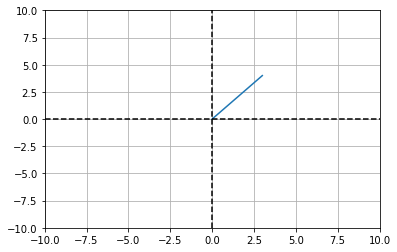

In [66]:
# plot the vector v in "standard position"
plt.plot([0,v[0]],[0,v[1]])

# create a dashed line in the x axis
plt.plot([-10, 10],[0, 0],'k--')

# create a dashed line in the y axis
plt.plot([0, 0],[-10, 10],'k--')

# add some grid lines
plt.grid()

# fit the axis
plt.axis((-10, 10, -10, 10))
plt.show()

In [67]:
# create a matrix to be used in transforming the vector v
a = np.matrix('1 -2; 3 -1.5')
c = a @ v
c

matrix([[-5.],
        [ 3.]])

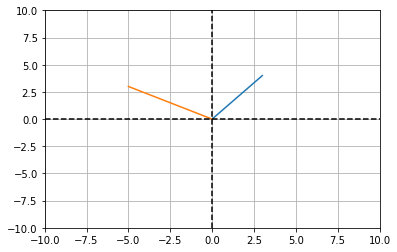

In [68]:
# plot the vectors c and c in "standard position"
plt.plot([0,v[0]],[0,v[1]])
plt.plot([0,c[0]],[0,c[1]])

# create a dashed lines
plt.plot([-10, 10],[0, 0],'k--')
plt.plot([0, 0],[-10, 10],'k--')

# add some grid lines
plt.grid()

# fit the axis
plt.axis((-10, 10, -10, 10))
plt.show()

#### 3d Transformation

Next, transform a 3d vector with a 3x3 matrix:

$
\begin{pmatrix}
    1 & -4   & .5 \\ 
    3 & -1.5 & 1.25 \\
   -1 & .5   & -.5 \\
\end{pmatrix}
\vec{\begin{bmatrix}
    3 \\
    4 \\
    5 \\
\end{bmatrix}}
=
\vec{\begin{bmatrix}
    (3\times{1})+(4\times{-2})+(5\times{.5}) \\
    (3\times{3})+(4\times{-1.5})+(5\times{1.25}) \\
    (3\times{-1})+(4\times{.5})+(5\times{-.5}) \\
\end{bmatrix}}
=
\vec{\begin{bmatrix}
    -10.5\\
    9.25\\
    -3.5
\end{bmatrix}}
$
</div></p>

In [69]:
# a vector at position 3, 4, 5
v = np.matrix('3 ;4; 5')
v

matrix([[3],
        [4],
        [5]])

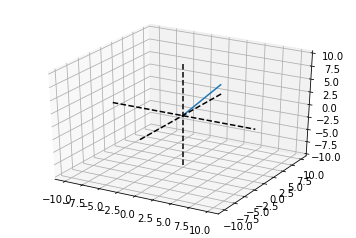

In [70]:
# plotting the 3-dimensional vector from the
# standard position 0,0,0
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot([0, v[0]],[0, v[1]],[0, v[2]])

# add some dashed lines across the x, y and z axis
ax.plot([0, 0],[0, 0],[-10, 10],'k--')
ax.plot([0, 0],[-10, 10],[0, 0],'k--')
ax.plot([-10, 10],[0, 0],[0, 0],'k--')
plt.show()

In [71]:
b = np.matrix('1 -4 .5; 3 -1.5 1.25; -1 .5 -.5')
b

matrix([[ 1.  , -4.  ,  0.5 ],
        [ 3.  , -1.5 ,  1.25],
        [-1.  ,  0.5 , -0.5 ]])

In [72]:
c = b @ v
c

matrix([[-10.5 ],
        [  9.25],
        [ -3.5 ]])

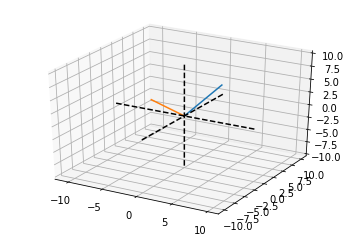

In [73]:
# plotting the 3-dimensional vector from the
# standard position 0,0,0
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot([0, v[0]],[0, v[1]],[0, v[2]])
ax.plot([0, c[0]],[0, c[1]],[0, c[2]])

# add some dashed lines across the x, y and z axis
ax.plot([0, 0],[0, 0],[-10, 10],'k--')
ax.plot([0, 0],[-10, 10],[0, 0],'k--')
ax.plot([-10, 10],[0, 0],[0, 0],'k--')
plt.show()

### Multiplication with a Diagonal Matrix

When a regular matrix ($\boldsymbol{F}$) multiplies a diagonal matrix ($\boldsymbol{D}$), it has the effect multiplying each column by the non-zero value in the corresponding diagonal matrix column.

<p><div>
$
\underbrace{\begin{pmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6 \\
    7 & 8 & 9 \\
\end{pmatrix}}_{\boldsymbol{F}}
\underbrace{\begin{pmatrix}
    \boldsymbol{t} & 0 & 0 \\
    0 & \boldsymbol{u} & 0 \\
    0 & 0 & \boldsymbol{v} \\
\end{pmatrix}}_{\boldsymbol{D}} = {
\begin{pmatrix}
    \boldsymbol{t}1 & \boldsymbol{u}2 & \boldsymbol{v}3 \\
    \boldsymbol{t}4 & \boldsymbol{u}5 & \boldsymbol{v}6 \\
    \boldsymbol{t}7 & \boldsymbol{u}8 & \boldsymbol{v}9 \\
\end{pmatrix}
}
$
</div></p>

When a diagonal matrix ($\boldsymbol{D}$) multiplies a regular matrix ($\boldsymbol{F}$), it has the effect multiplying each row by the non-zero value in the corresponding diagonal matrix row.

<p><div>
$
\underbrace{\begin{pmatrix}
    \boldsymbol{t} & 0 & 0 \\
    0 & \boldsymbol{u} & 0 \\
    0 & 0 & \boldsymbol{v} \\
\end{pmatrix}}_{\boldsymbol{D}}
\underbrace{\begin{pmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6 \\
    7 & 8 & 9 \\
\end{pmatrix}}_{\boldsymbol{F}} = 
{\begin{pmatrix}
    \boldsymbol{t}1 & \boldsymbol{t}2 & \boldsymbol{t}3 \\
    \boldsymbol{u}4 & \boldsymbol{u}5 & \boldsymbol{u}6 \\
    \boldsymbol{v}7 & \boldsymbol{v}8 & \boldsymbol{v}9 \\
\end{pmatrix}}
$
</div></p>

In [74]:
# create a 3x3 matrix with values from 1 to 10
f = np.arange(1,10).reshape(3,3)
f

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [75]:
# create a diagonal matrix 
d = np.diag([2,4,5])
d

array([[2, 0, 0],
       [0, 4, 0],
       [0, 0, 5]])

In [76]:
d @ f

array([[ 2,  4,  6],
       [16, 20, 24],
       [35, 40, 45]])

In [77]:
f @ d

array([[ 2,  8, 15],
       [ 8, 20, 30],
       [14, 32, 45]])

### Order of Operations

Reverse the matrix order when performing an operation (such as transpose) on multiplied matricies.

$\boldsymbol{X} = (\boldsymbol{A}\boldsymbol{B}\boldsymbol{C})^T = \boldsymbol{C}^T\boldsymbol{B}^T\boldsymbol{A}^T$

In [78]:
# create 3, 3x3 matricies using octave/matlab style notation
a = np.matrix('1 2 3; 4 5 6; 7 8 9')
b = np.matrix('4 2 1; 7 8 2; 1 2 3')
c = np.matrix('5 4 3; 2 1 2; 3 4 5')
print(f'matrix A =\n{a}\n\nmatrix B =\n{b}\n\nmatrix C =\n{c}\n')

matrix A =
[[1 2 3]
 [4 5 6]
 [7 8 9]]

matrix B =
[[4 2 1]
 [7 8 2]
 [1 2 3]]

matrix C =
[[5 4 3]
 [2 1 2]
 [3 4 5]]



In [79]:
x = (a * b * c).T
x

matrix([[195, 501, 807],
        [164, 416, 668],
        [181, 451, 721]])

In [80]:
np.array_equal(x, (a.T * b.T * c.T))

False

In [81]:
np.array_equal(x, (c.T * b.T * a.T))

True

### Hadamard Multiplication (element-wise)

Hadamard multiplication simply multiplies an element in the first matrix by the corresponding element in another. The Hadamard product is [commutative], [associative] and [distributive].

<p><div>
$\underbrace{
\begin{pmatrix}
    a_{11} & a_{12} \\
    a_{21} & a_{22} \\
\end{pmatrix}
}_{\boldsymbol{A}} \odot 
\underbrace{\begin{pmatrix}
    b_{11} & b_{12} \\
    b_{21} & d_{22} \\
\end{pmatrix}
}_{\boldsymbol{B}} \odot 
\underbrace{\begin{pmatrix}
    c_{11} & c_{12} \\
    c_{21} & c_{22} \\
\end{pmatrix}}_{\boldsymbol{C}} = 
\begin{pmatrix}
    a_{11}b_{11}c_{11} & a_{12}b_{12}c_{12} \\
    a_{21}b_{21}c_{21} & a_{22}b_{22}c_{22} \\
\end{pmatrix}
$
</div></p>

<p><div>
$\boldsymbol{A} \odot \boldsymbol{B} =  \boldsymbol{B} \odot \boldsymbol{A}$
</div></p>

<p><div>
$\boldsymbol{A} \odot (\boldsymbol{B} \odot \boldsymbol{C}) = (\boldsymbol{A} \odot \boldsymbol{B}) \odot \boldsymbol{C}$
</div></p>

[associative]: https://en.wikipedia.org/wiki/Associative_property
[commutative]: https://en.wikipedia.org/wiki/Commutative_property
[distributive]: https://en.wikipedia.org/wiki/Distributive_property

In [82]:
a = np.matrix('1 2; 3 4; 5 6')
b = np.matrix('6 5; 5 4; 4 3')
c = np.matrix('4 1; 3 2; 2 1')

print(f'matrix A =\n{a}\n\nmatrix B =\n{b}\n\nmatrix C =\n{c}\n')

matrix A =
[[1 2]
 [3 4]
 [5 6]]

matrix B =
[[6 5]
 [5 4]
 [4 3]]

matrix C =
[[4 1]
 [3 2]
 [2 1]]



In [83]:
d = np.multiply(a,b)
d

matrix([[ 6, 10],
        [15, 16],
        [20, 18]])

In [84]:
np.array_equal(d, np.multiply(b,a))

True

### Vectorizing a Matrix

Vectorizing a matrix is always done column-wise:

<p><div>$
\begin{pmatrix}
    a & b & c \\
    d & e & f \\
\end{pmatrix}
= \vec{\begin{bmatrix}
    a \\ d \\ b \\ e \\ c \\ f
\end{bmatrix}}
$</div></p>

In [85]:
a = np.matrix('5 4 3; 2 1 0')
a

matrix([[5, 4, 3],
        [2, 1, 0]])

In [86]:
# order=‘F’ means to flatten in column-major order
# see: https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.flatten.html
a.flatten(order='F')

matrix([[5, 2, 4, 1, 3, 0]])

### Frobenius Dot Product (inner product)

The Frobenius dot product, or inner product is a element-wise product of two matricies consisting of a single number (as though they are vectors.) The matricies can be square or rectangular, however they must have the same number of rows and columns. 

<p><div>
$\mathbf {A} ={\begin{pmatrix}
A_{11} & A_{12} & \cdots &A_{1m} \\
A_{21} & A_{22} & \cdots &A_{2m} \\
\vdots &\vdots &\ddots &\vdots   \\ 
A_{n1} &A_{n2} &\cdots &A_{nm}   \\
\end{pmatrix}} \,, \quad \mathbf {B} ={\begin{pmatrix}B_{11}&B_{12}&\cdots &B_{1m}\\B_{21}&B_{22}&\cdots &B_{2m}\\\vdots &\vdots &\ddots &\vdots \\B_{n1}&B_{n2}&\cdots &B_{nm}\\\end{pmatrix}}$
</div></p>

<p><div>
$\langle \mathbf{A}, \mathbf{B} \rangle_\mathrm{F} =\sum_{i,j}A_{ij} B_{ij} \,, = \mathrm{tr}\left(\mathbf{A}^T \mathbf{B}\right)$
</div></p>

see [Frobenius inner product on Wikipedia](https://en.wikipedia.org/wiki/Frobenius_inner_product) for a detailed explination.

The Frobenius inner product is a sum over all the elements in a Hadamard (element-wise) multiplication.

<p><div>
$
\sum^m_{i=1}\sum^n_{j=1}\left(
\underbrace{\begin{pmatrix}
    1 & 2 & 3 & 4 \\
    5 & 6 & 7 & 8 \\
    9 & 10 & 11 & 12 \\
\end{pmatrix}}_{\boldsymbol{A}}
\odot 
\underbrace{\begin{pmatrix}
    1 & 1.25 & 1.5 & 1.75 \\
    2 & 2.25 & 2.5 & 2.75 \\
    3 & 3.25 & 3.5 & 3.75 \\
\end{pmatrix}}_{\boldsymbol{B}}
\right)_{ij} = 221
$
</div></p>



In [87]:
a = np.arange(1,13).reshape(3,4)
b = np.arange(1,4,.25).reshape(3,4)

In [88]:
# sum over Hadamard (element-wise) multiplication
# not as computationaly effecient as other methods below
np.multiply(a, b).sum()

221.0

The Frobenius inner product can also be determined by the dot product of vectorized matricies.

<p><div>
$
vec\left(
\underbrace{\begin{bmatrix}
    1 & 2 & 3 & 4 \\
    5 & 6 & 7 & 8 \\
    9 & 10 & 11 & 12 \\
\end{bmatrix}}_{\boldsymbol{A}}
\right)
\cdot 
vec\left(
\underbrace{\begin{bmatrix}
    1 & 1.25 & 1.5 & 1.75 \\
    2 & 2.25 & 2.5 & 2.75 \\
    3 & 3.25 & 3.5 & 3.75 \\
\end{bmatrix}}_{\boldsymbol{B}}
\right) = 
\vec{\begin{bmatrix}
    1 \\ 5 \\ 9 \\ 2 \\ 6 \\ 10 \\ 3 \\ 7 \\ 11 \\ 8 \\ 8 \\ 12
\end{bmatrix}}
\cdot
\vec{\begin{bmatrix}
    1 \\ 2 \\ 3 \\ 1.25 \\ 2.25 \\ 3.25 \\ 1.5 \\ 2.5 \\ 3.5 \\ 1.75 \\ 2.75 \\ 3.75
\end{bmatrix}} = 221
$
</div></p>

In [89]:
b.flatten(order='F').T

array([ 1.  ,  2.  ,  3.  ,  1.25,  2.25,  3.25,  1.5 ,  2.5 ,  3.5 ,
        1.75,  2.75,  3.75])

In [90]:
# Frobenius product using vectors
np.dot( a.flatten(order='F'),b.flatten(order='F') )

221.0

Calculating the trace of $\mathbf{A}^T \mathbf{B}$ is more computationaly effecient than the methods above.

<p><div>
$\mathrm{tr}\left(
\underbrace{\begin{pmatrix}
    1 & 5 & 9 \\
    2 & 6 & 10 \\
    3 & 7 & 11 \\
    4 & 8 & 12 \\
\end{pmatrix}}_{\mathbf{A}^T}
\underbrace{\begin{pmatrix}
    1 & 1.25 & 1.5 & 1.75 \\
    2 & 2.25 & 2.5 & 2.75 \\
    3 & 3.25 & 3.5 & 3.75 \\
\end{pmatrix}}_{\mathbf{B}}
\right) = \underbrace{\sum^n_{i,j=1}\begin{pmatrix}
 \boldsymbol{38}  &  41.75 &  45.5 &  49.25 \\
 44  &  \boldsymbol{48.5}  &  53   &  57.5  \\
 50  &  55.25 &  \boldsymbol{60.5} &  65.75 \\
 56  &  62    &  68  &  \boldsymbol{74}   \\
\end{pmatrix}_{ij}}_{trace} = 221
$
</div></p>

In [91]:
# Frobenius product using trace
# perfered method for computational performance
np.trace( a.T@b )

221.0

### Forbenius Norm (Euclidean Norm)

The norm of a matrix is the square root of the Forbenius dot product with itself.

<p><div>
$
norm\left(\mathbf{A}\right) =
\sqrt{\langle\mathbf{A},\mathbf{A}\rangle_F} =
\sqrt{\left(\mathbf{A}^T\mathbf{A}\right)}
$
</div></p>


In [92]:
np.sqrt( np.trace( a.T@a ) )

25.495097567963924

In [93]:
np.linalg.norm(a, 'fro')

25.495097567963924

## Rank

The rank $rank\left(\mathbf{A}\right) = r\left(\mathbf{A}\right)$ of a matrix is the number dimentions of information, specifically the number of linearly independent rows or columns. Rank reveals the amount of information contained in a matrix and is always a non-negative integer as it is related to the dimentionality of the matrix. 

**Rules**
- $rank\left(\mathbf{A}\right) \leq min\left({m},{n}\right)$
- $rank\left(\mathbf{A}+\mathbf{B}\right) \leq rank\left(\mathbf{A}\right) + rank\left(\mathbf{B}\right)$
- $rank\left(\mathbf{AB}\right) \leq min\left( rank\left(\mathbf{A}\right), rank\left(\mathbf{B}\right) \right)$
- $rank\left(\mathbf{A}\right) = rank\left(\mathbf{A^T}\mathbf{A}\right) = rank\left(\mathbf{A^T}\right)  = rank\left(\mathbf{A}\mathbf{A^T}\right)$

**Types**:
- $rank\underset{{m}\times{m}}{\left(\mathbf{A}\right)} = {m} \implies $ Full Rank
- $rank\underset{{m}\gt{n}}{\left(\mathbf{A}\right)} = {n} \implies $ Full Column Rank
- $rank\underset{{m}\lt{n}}{\left(\mathbf{A}\right)} = {m} \implies $ Full Row Rank
- $rank\underset{{m}\times{n}}{\left(\mathbf{A}\right)} \lt {m,n} \implies $ Reduced / Deficient / Degenerate (Singular)

In [94]:
np.random.seed(0)
a = np.random.randn(6,3)
a

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721, -0.10321885],
       [ 0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323],
       [ 0.33367433,  1.49407907, -0.20515826]])

In [95]:
np.linalg.matrix_rank(a)

3

In [96]:
b = np.full((5,5), 1)
b

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [97]:
np.linalg.matrix_rank(b)

1

Create a matrix of any size of a specific rank. The rank can not be greater than m or n. Using random numbers gives a high assurance that we will get a full rank for the number of columns in $\mathbf{A}$ and the number of rows in $\mathbf{B}$.

In [98]:
rnk = 5
m = 50
n = 12

a = np.random.randn(m,rnk)
b = np.random.randn(rnk,n)

c = a @ b
np.linalg.matrix_rank(c)

5

In [99]:
c.shape

(50, 12)

### Shifting

Transform a reduced rank matrix into a full-rank matrix without significant changes to the data.

<p><div>
$
\widetilde{\mathbf{A}} = \mathbf{A} + \lambda\mathbf{I}
$
</div></p>

<p><div>
$
\underbrace{\begin{pmatrix}
    2 & 4 & 5 \\
    -2 & -4 & -2 \\
    2 & 4 & 8 \\
\end{pmatrix}}_{\mathbf{\underset{A}{Rank 2}}} +
\underset{\lambda}{.0001}
\underbrace{\begin{pmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1 \\
\end{pmatrix}}_{Identity} = 
\underbrace{\begin{pmatrix}
    2.0001 & 4 & 5 \\
    -2 & -3.9999 & -2 \\
    2 & 4 & -7.9999 \\
\end{pmatrix}}_{\mathbf{\underset{B}{Rank 3}}}
$
</div></p>

In [100]:
a = np.matrix('2 4 5; -2 -4 -2; 2 4 -8')
np.linalg.matrix_rank(a)

2

In [101]:
b = a + (.0001 * np.eye(3,3))
b

matrix([[ 2.0001,  4.    ,  5.    ],
        [-2.    , -3.9999, -2.    ],
        [ 2.    ,  4.    , -7.9999]])

In [102]:
np.linalg.matrix_rank(b)

3

### Vector Span with Rank

Using rank to determine if a set of vectors spans a matrix. If the rank of a matrix increases with the addition of a vector, then the vector was not in the span of the matrix.

<p><div>
$
\underbrace{\overset{\mathbf{A}}{\begin{pmatrix}
    1 & 2 & 3 & 4 \\
    4 & 5 & 6 & 7 \\
    8 & 9 & 10 & 11 \\
\end{pmatrix}}}_{r=2} \sqcup	
\overset{\vec{v}}{\begin{bmatrix}
    5 \\
    8 \\
    12 \\
\end{bmatrix}} =
\underbrace{\overset{\mathbf{B}}{\left(
\begin{array}{cccc|c}
    1 & 2 & 3 & 4 & 5\\
    4 & 5 & 6 & 7 & 8\\
    8 & 9 & 10 & 11 & 12\\
\end{array}\right)}}_{r=2}
$
</div></p>

<p><div>
$
rank\left(\mathbf{B}\right) = rank\left(\mathbf{A}\right)
$
</div></p>

$\vec{v}$ is in the span of matrix $\mathbf{A}$.

<p><div>
$
\underbrace{\overset{\mathbf{A}}{\begin{pmatrix}
    1 & 2 & 3 & 4 \\
    4 & 5 & 6 & 7 \\
    8 & 9 & 10 & 11 \\
\end{pmatrix}}}_{r=2} \sqcup	
\overset{\vec{w}}{\begin{bmatrix}
    0 \\
    0 \\
    2 \\
\end{bmatrix}} =
\underbrace{\overset{\mathbf{C}}{\left(
\begin{array}{cccc|c}
    1 & 2 & 3 & 4 & 0\\
    4 & 5 & 6 & 7 & 0\\
    8 & 9 & 10 & 11 & 2\\
\end{array}\right)}}_{\mathbf{r=3}}
$
</div></p>

<p><div>
$
rank\left(\mathbf{C}\right) > rank\left(\mathbf{A}\right)
$
</div></p>

$\vec{w}$ is **not** in the span of matrix $\mathbf{A}$.

In [103]:
v = np.array([[5], [8], [12]])

In [104]:
a = np.matrix('1 2 3 4; 4 5 6 7; 8 9 10 11')
a

matrix([[ 1,  2,  3,  4],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [105]:
np.linalg.matrix_rank(a)

2

In [106]:
b = np.append(a, v, axis=1)
b

matrix([[ 1,  2,  3,  4,  5],
        [ 4,  5,  6,  7,  8],
        [ 8,  9, 10, 11, 12]])

In [107]:
np.linalg.matrix_rank(b)

2

In [108]:
w = np.array([[0], [0], [2]])
c = np.append(a, w, axis=1)
np.linalg.matrix_rank(c)

3

## Matrix Spaces

Is a vector in the space of a matrix, $\vec{v} \in C(\mathbf{A})$, and if not, what is the distance? Answering this question is one of the fundamental methods in statistics and machine learning. 

Column space of a matrix is often noted as $C(\mathbf{A})$ and row space as $R(\mathbf{A})$.


<p><div>$
R(\mathbf{A}) = C(\mathbf{A}^T) = \{{\beta_1}{a_1}+...+\beta_{n}{a}_{n},\beta \in \mathbb{R}\}
$</div></p>  

<p><div>$
\vec{\begin{bmatrix} 1 \\ 2 \\ 3 \\ \end{bmatrix}}
\vec{\begin{bmatrix} 4 \\ 5 \\ 6 \\ \end{bmatrix}}
\vec{\begin{bmatrix} 7 \\ 8 \\ 9 \\ \end{bmatrix}} \implies
\left(\begin{array}{c|c|c}
    1 & 4 & 7 \\
    2 & 5 & 8 \\
    3 & 6 & 9 \\
\end{array}\right)
$</div></p>

Find out if a vector is in the column span of a matrix. 

<p><div>$
\vec{\begin{bmatrix} 1 \\ 2 \\ 3 \\ \end{bmatrix}}
\in
C\left(\begin{bmatrix} 
    1 & 4 & 7 \\ 
    2 & 5 & 8 \\ 
    3 & 6 & 9 \\
\end{bmatrix}\right)
$</div></p>   

## Matrix Inverse